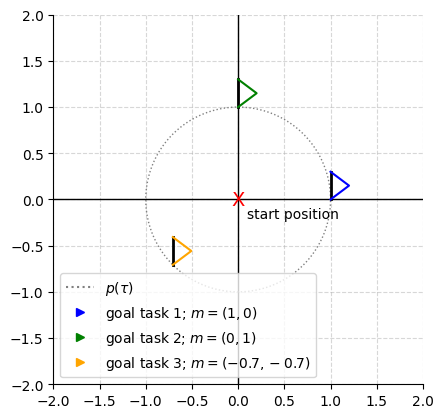

In [171]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Create figure and axis
fig, ax = plt.subplots()

# Set limits for the plot
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# Draw axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

# Add a dotted unit circle
theta = np.linspace(0, 2 * np.pi, 300)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
ax.plot(x_circle, y_circle, linestyle=':', color='gray', linewidth=1, label="$p(\tau)$")

# Add an 'X' at the origin and label
ax.text(0, 0, 'X', fontsize=14, ha='center', va='center', color='red', label="Start Position")
ax.text(0.1, -0.2, 'start position', fontsize=10, color='black')

# Define flag positions and colors
flags = [
    ((1, 0), 'goal location task 1', 'blue'),
    ((0, 1), 'goal location task 2', 'green'),
    ((-np.sqrt(2)/2, -np.sqrt(2)/2), 'goal location task 3', 'orange'),
]

# Function to draw a flag
def draw_flag(x, y, color):
    ax.plot([x, x], [y, y + 0.3], color='black', linewidth=2)  # pole
    ax.plot([x, x + 0.2, x], [y + 0.3, y + 0.15, y], color=color)  # flag

# Draw all flags
for (x, y), _, color in flags:
    draw_flag(x, y, color)

# Create custom legend entries
# Create custom legend entries (including unit circle)
legend_elements = [
    Line2D([0], [0], linestyle=':', color='gray', label='$p(\\tau)$'),  # unit circle
    Line2D([0], [0], color='blue', marker='>', linestyle='None', label='goal task 1; $m=(1,0)$'),
    Line2D([0], [0], color='green', marker='>', linestyle='None', label='goal task 2; $m=(0,1)$'),
    Line2D([0], [0], color='orange', marker='>', linestyle='None', label='goal task 3; $m=(-0.7,-0.7)$'),
]


# Add legend with best placement
ax.legend(handles=legend_elements, loc='best', ncols=1)

# Set aspect ratio and grid
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.5)

# Hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
